In [28]:
import scipy as sci

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
%matplotlib inline
#these will allow us to do 3D plotting

In [2]:
#I used this article as a reference to learn about the general practices when modeling orbital mechanics/astrodynamics:
#https://towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767

In [3]:
#First a practice system, to see how things work
#For this we'll use the Alpha Centauri System

#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2

#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#Using these reference quantities we can absorb everything into the following net constants, allowing masses, positions,
#velocities, etc. to be non-demensionalized

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [4]:
#Now all quantities are in terms of reference quantities

#Define masses in terms of solar masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B

#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1 + m2*r2)/(m1 + m2)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1 + m2*v2)/(m1 + m2)

In [5]:
#A function defining the equations of motion 
#Here w is an array containing all dependant parameters, which are the positions and velocities
#and t is an array containing the independant parameter, which is time
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [6]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [7]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

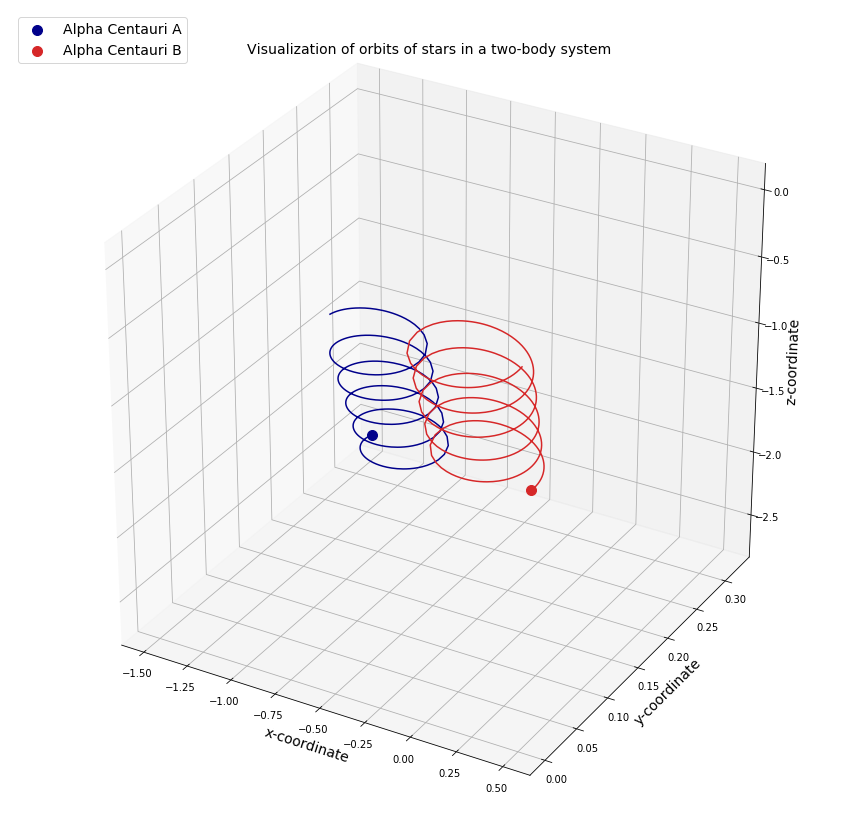

In [8]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [9]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

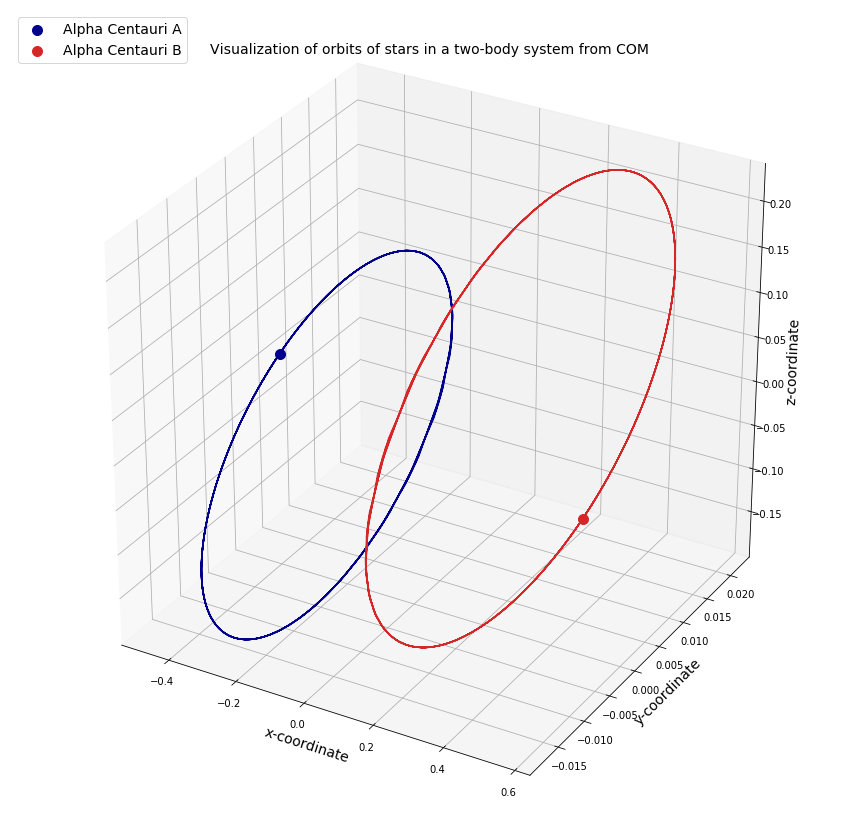

In [10]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="darkblue")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system from COM\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [17]:
#Now that we have seen how these tools work, let's look at molding the problem towards a mechanical model of
#magnetorotational instability. First lets look at a two body system where one body is much smaller than the other.

#Redefine reference quantities for a Sun-Jupiter system
m_nd=1.989e+30 #kg #mass of the sun
r_nd=7.785e+11 #m #distance between Sun and Jupiter
v_nd=0.434*30000 #m/s #relative velocity of earth around the sun
t_nd=12*365*24*3600 #s #orbital period of Alpha Centauri

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define news masses in terms of solar masses
m1=1 #One solar mass
m2=0.0009543 #A Jupiter-sized planet

#Define initial position vectors
#Starting with "Sun" at the center and Jupiter at 
r1=[0,0,0] #m
r2=[1,0,0] #m

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1 + m2*r2)/(m1 + m2)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1 + m2*v2)/(m1 + m2)

In [18]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [19]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

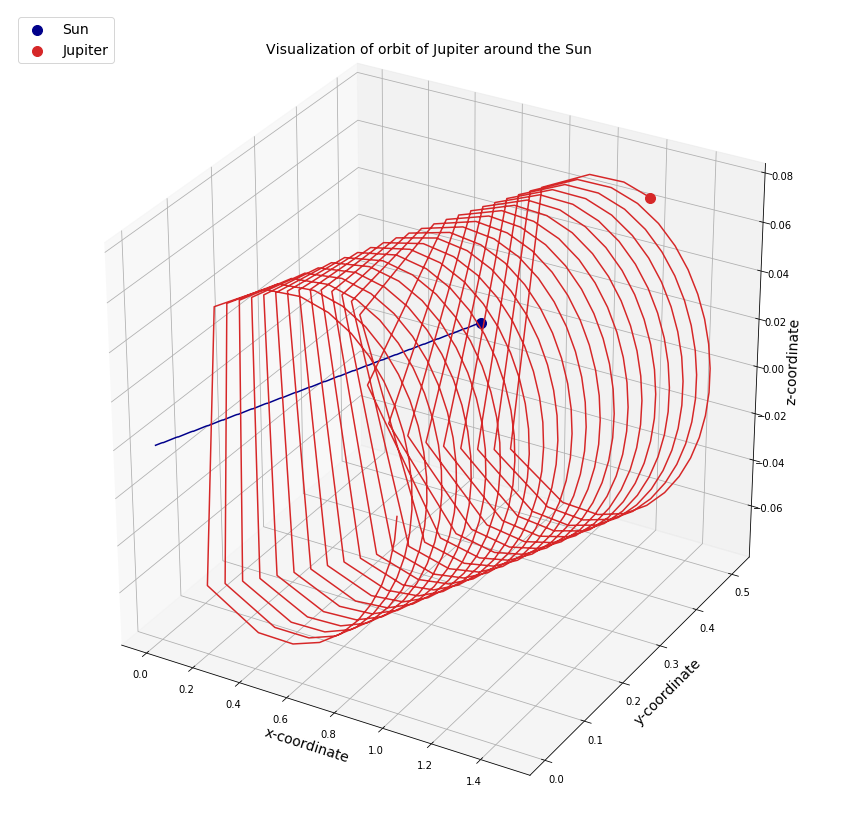

In [20]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Sun")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Jupiter")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbit of Jupiter around the Sun\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [21]:
#Now let us model an Earth-Sun system, where the mass ratio is much greater
#Redefine reference quantities for an Earth-Sun system
m_nd=1.989e+30 #kg #mass of the sun
r_nd=1.496e+11 #m #distance between Sun and Earth
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=365*24*3600 #s #orbital period of the Earth in seconds

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define news masses in terms of solar masses
m1=1 #One solar mass
m2=0.000003003 #An Earth-sized planet

#Define initial position vectors
#Starting with "Sun" at the center and Jupiter at 
r1=[0,0,0] #m
r2=[1,0,0] #m

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1 + m2*r2)/(m1 + m2)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1 + m2*v2)/(m1 + m2)

In [22]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [23]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

<IPython.core.display.Javascript object>


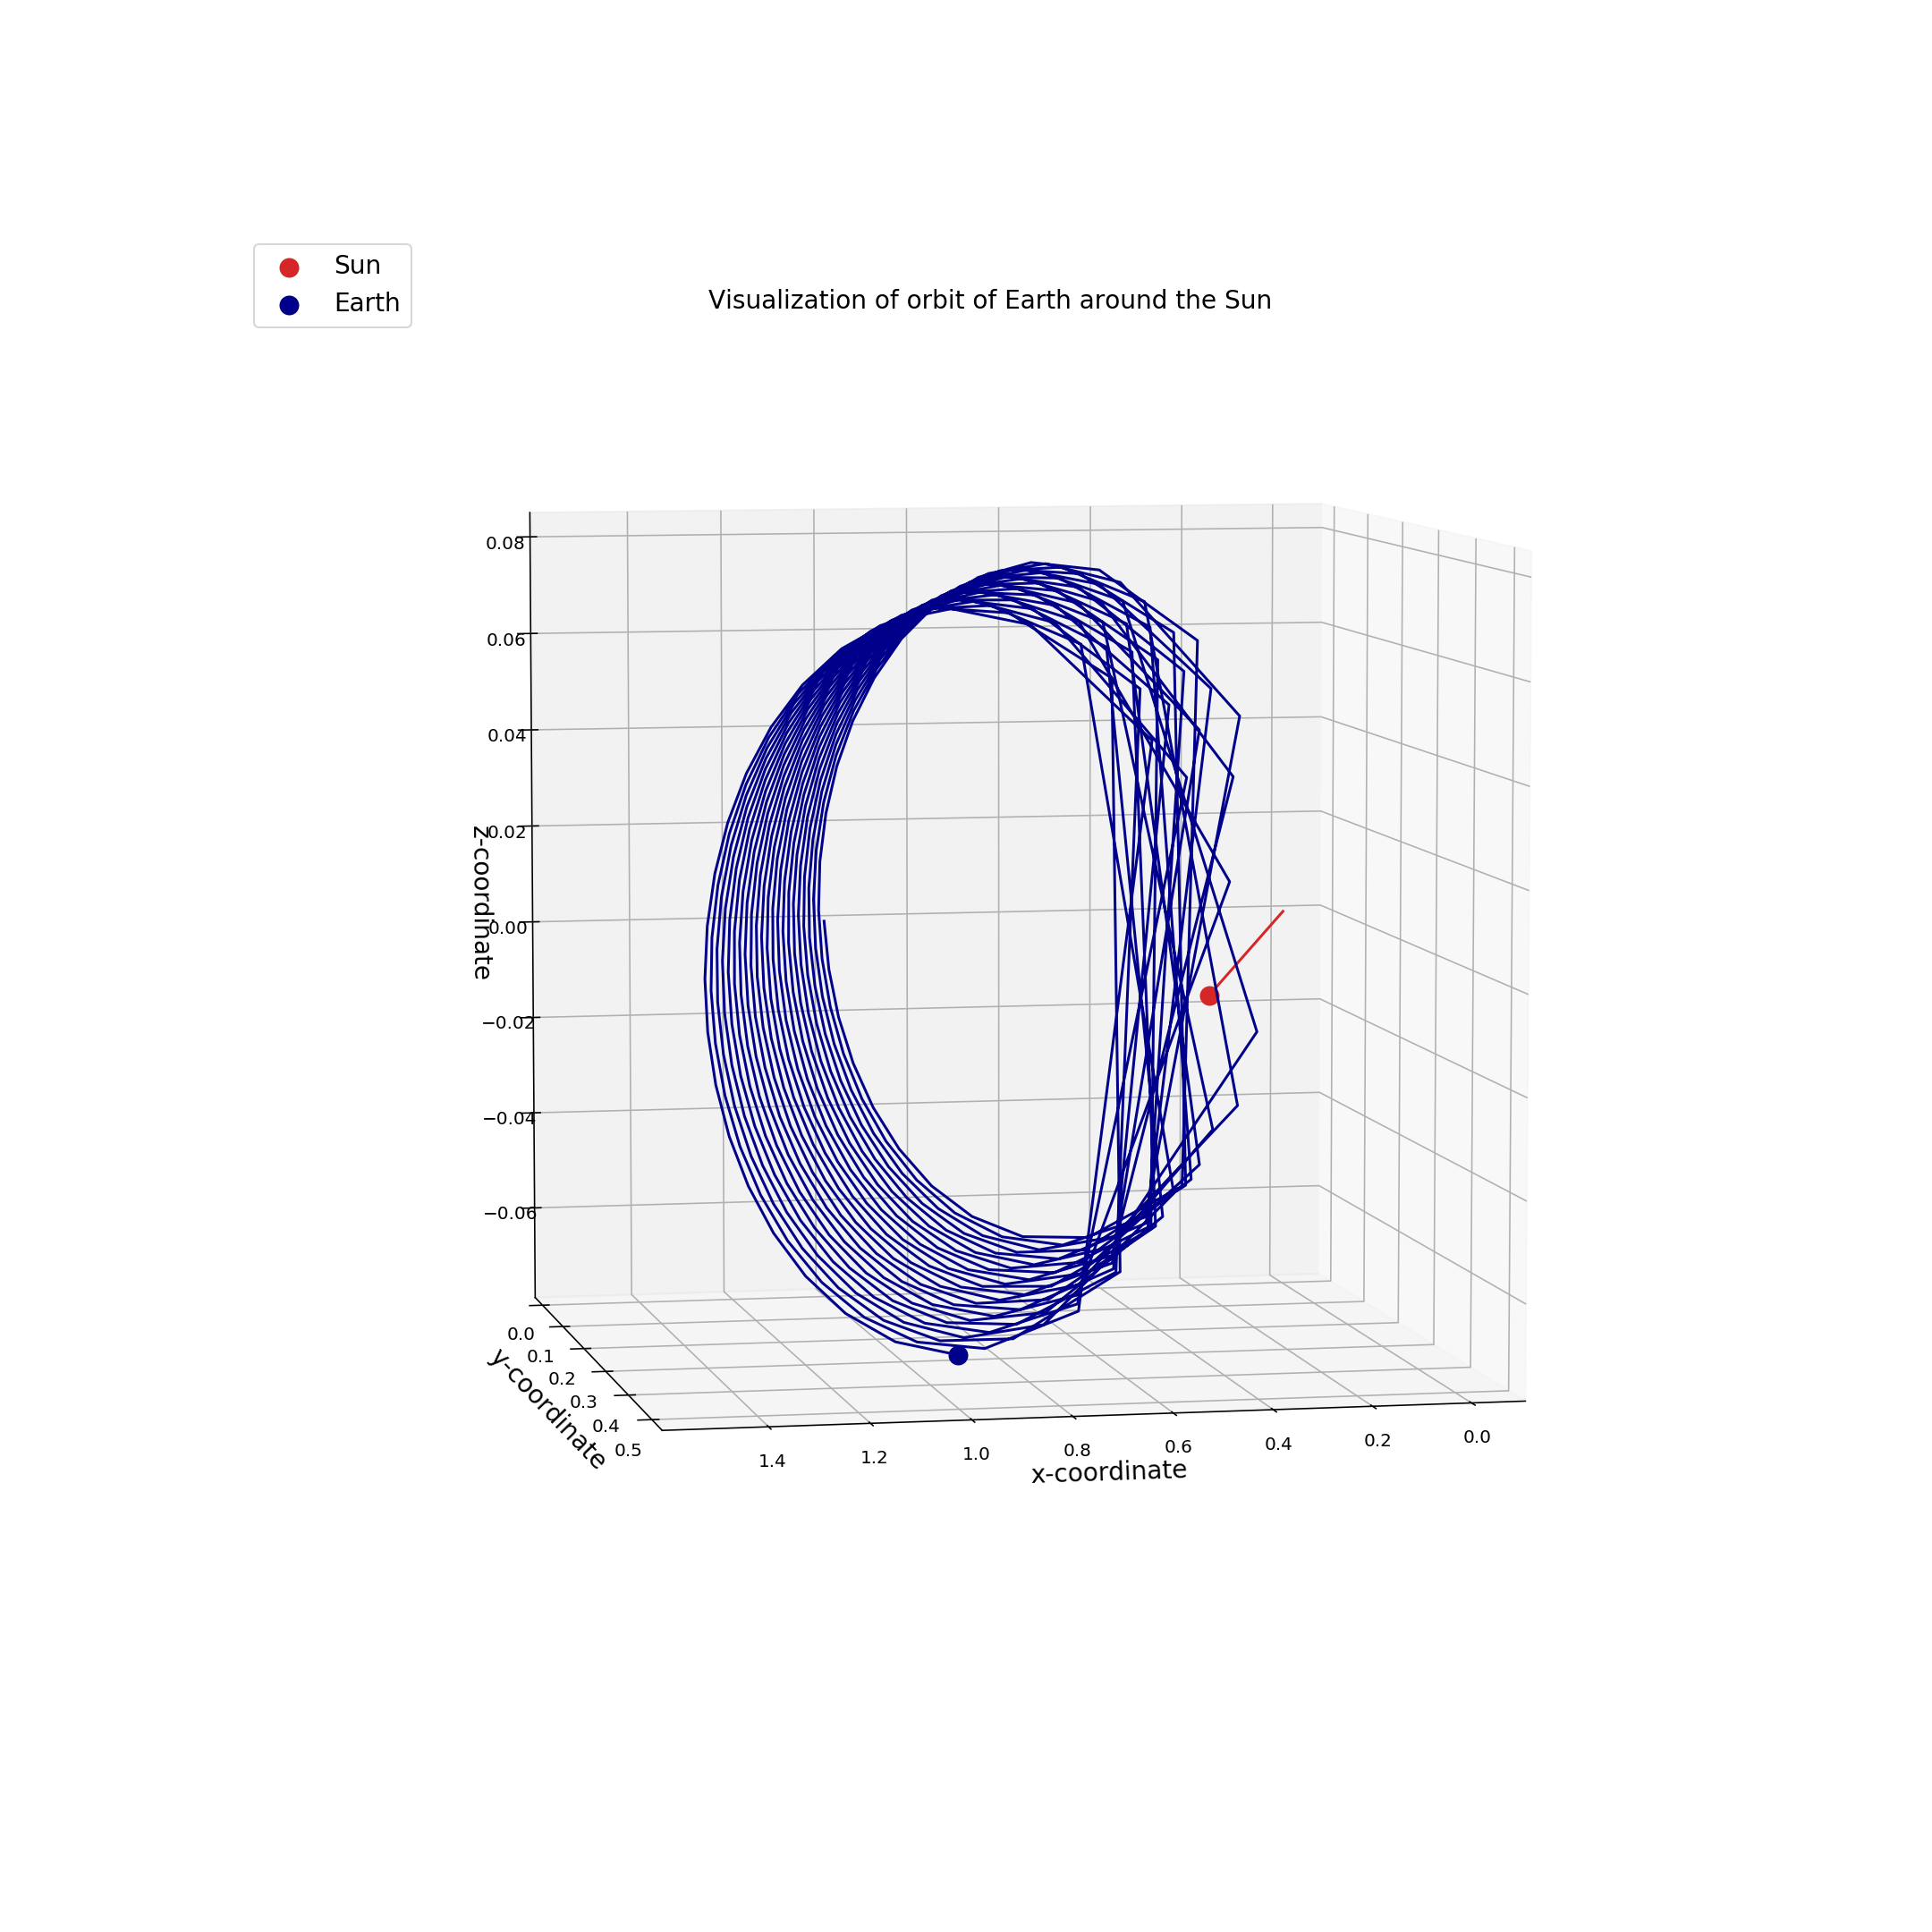

In [33]:
%matplotlib notebook
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="tab:red")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="darkblue")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="tab:red",marker="o",s=100,label="Sun")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="darkblue",marker="o",s=100,label="Earth")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbit of Earth around the Sun\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [137]:
#Now lets create a function to define the new differential equations we will need to model a system with two orbiting
#bodies connected by a spring.
#Note that w is now of length 18. Also, in general since the mass of the central body is so much greater than the two
#orbiting, it will not be affected much by the gravity of the orbiting bodies.
#Here c,i,o are the central, inner orbiting, and outer orbiting bodies respectively

'''
See notes in the accompanying notebook, "DiffEq Calculations" to see the process of calculating the new differential
equations used in the function below!
'''

#Making sure constants and references are correct before continuing with function...
m_nd=1.989e+30 #kg #mass of the sun
r_nd=1.496e+11 #m #distance between Sun and Earth
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=365*24*3600 #s #orbital period of the Earth in seconds

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd
k = 0 #for now, setting the spring constant such that K3 is about the same order of magnitude as K1
K3 = k*r_nd 

def SpringEquations(w,t,G,Mc,mi,mo):
    rc=w[:3]
    ri=w[3:6]
    ro=w[6:9]
    vc=w[9:12]
    vi=w[12:15]
    vo=w[15:18]
    
    r1=sci.linalg.norm(ri-rc)
    r2=sci.linalg.norm(ri-ro)
    r3=sci.linalg.norm(ro-rc)
    
    dvcbydt=K1*(mo*(rc-ro)/r3**3 + mi*(rc-ri)/r1**3)
    dvibydt=K1*(Mc*(ri-rc)/r1**3 + mo*(ri-ro)/r2**3) + K3*(ro-ri)
    dvobydt=K1*(Mc*(ro-rc)/r3**3 + mi*(ro-ri)/r2**3) + K3*(ri-ro)
    drcbydt=K2*vc
    dribydt=K2*vi
    drobydt=K2*vo
    
    r_derivs=sci.concatenate((drcbydt,dribydt,drobydt))
    derivs=sci.concatenate((r_derivs,dvcbydt,dvibydt,dvobydt))
    return derivs

In [68]:
#Define news masses in terms of solar masses
#For now we will set mi=mo
Mc=1 #One solar mass
mi=0.000003003 #An Earth-sized planet
mo=0.000003003 #An Earth-sized planet

#Define initial position vectors
#Starting with "Sun" at the center and each orbiting mass at slightly different radii (about the distance of the Earth
#to the moon).
rc=[0,0,0] #m
ri=[0.999,0,0] #m
ro=[1.001,0,0] #m

#Convert pos vectors to arrays
rc=sci.array(rc,dtype="float64")
ri=sci.array(ri,dtype="float64")
ro=sci.array(ro,dtype="float64")

#Find Centre of Mass
r_com=(Mc*rc + mi*ri + mo*ro)/(Mc + mi + mo)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
v3=[-0.05,0,-0.1]

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")

#Find velocity of COM
v_com=(Mc*v1 + mi*v2 + mo*v3)/(Mc + mi + mo)

In [69]:
#Package initial parameters
init_params=sci.array([rc,ri,ro,v1,v2,v3]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
spring_sol=sci.integrate.odeint(SpringEquations,init_params,time_span,args=(G,Mc,mi,mo))

In [70]:
rc_sol=spring_sol[:,:3]
ri_sol=spring_sol[:,3:6]
ro_sol=spring_sol[:,6:9]

<IPython.core.display.Javascript object>


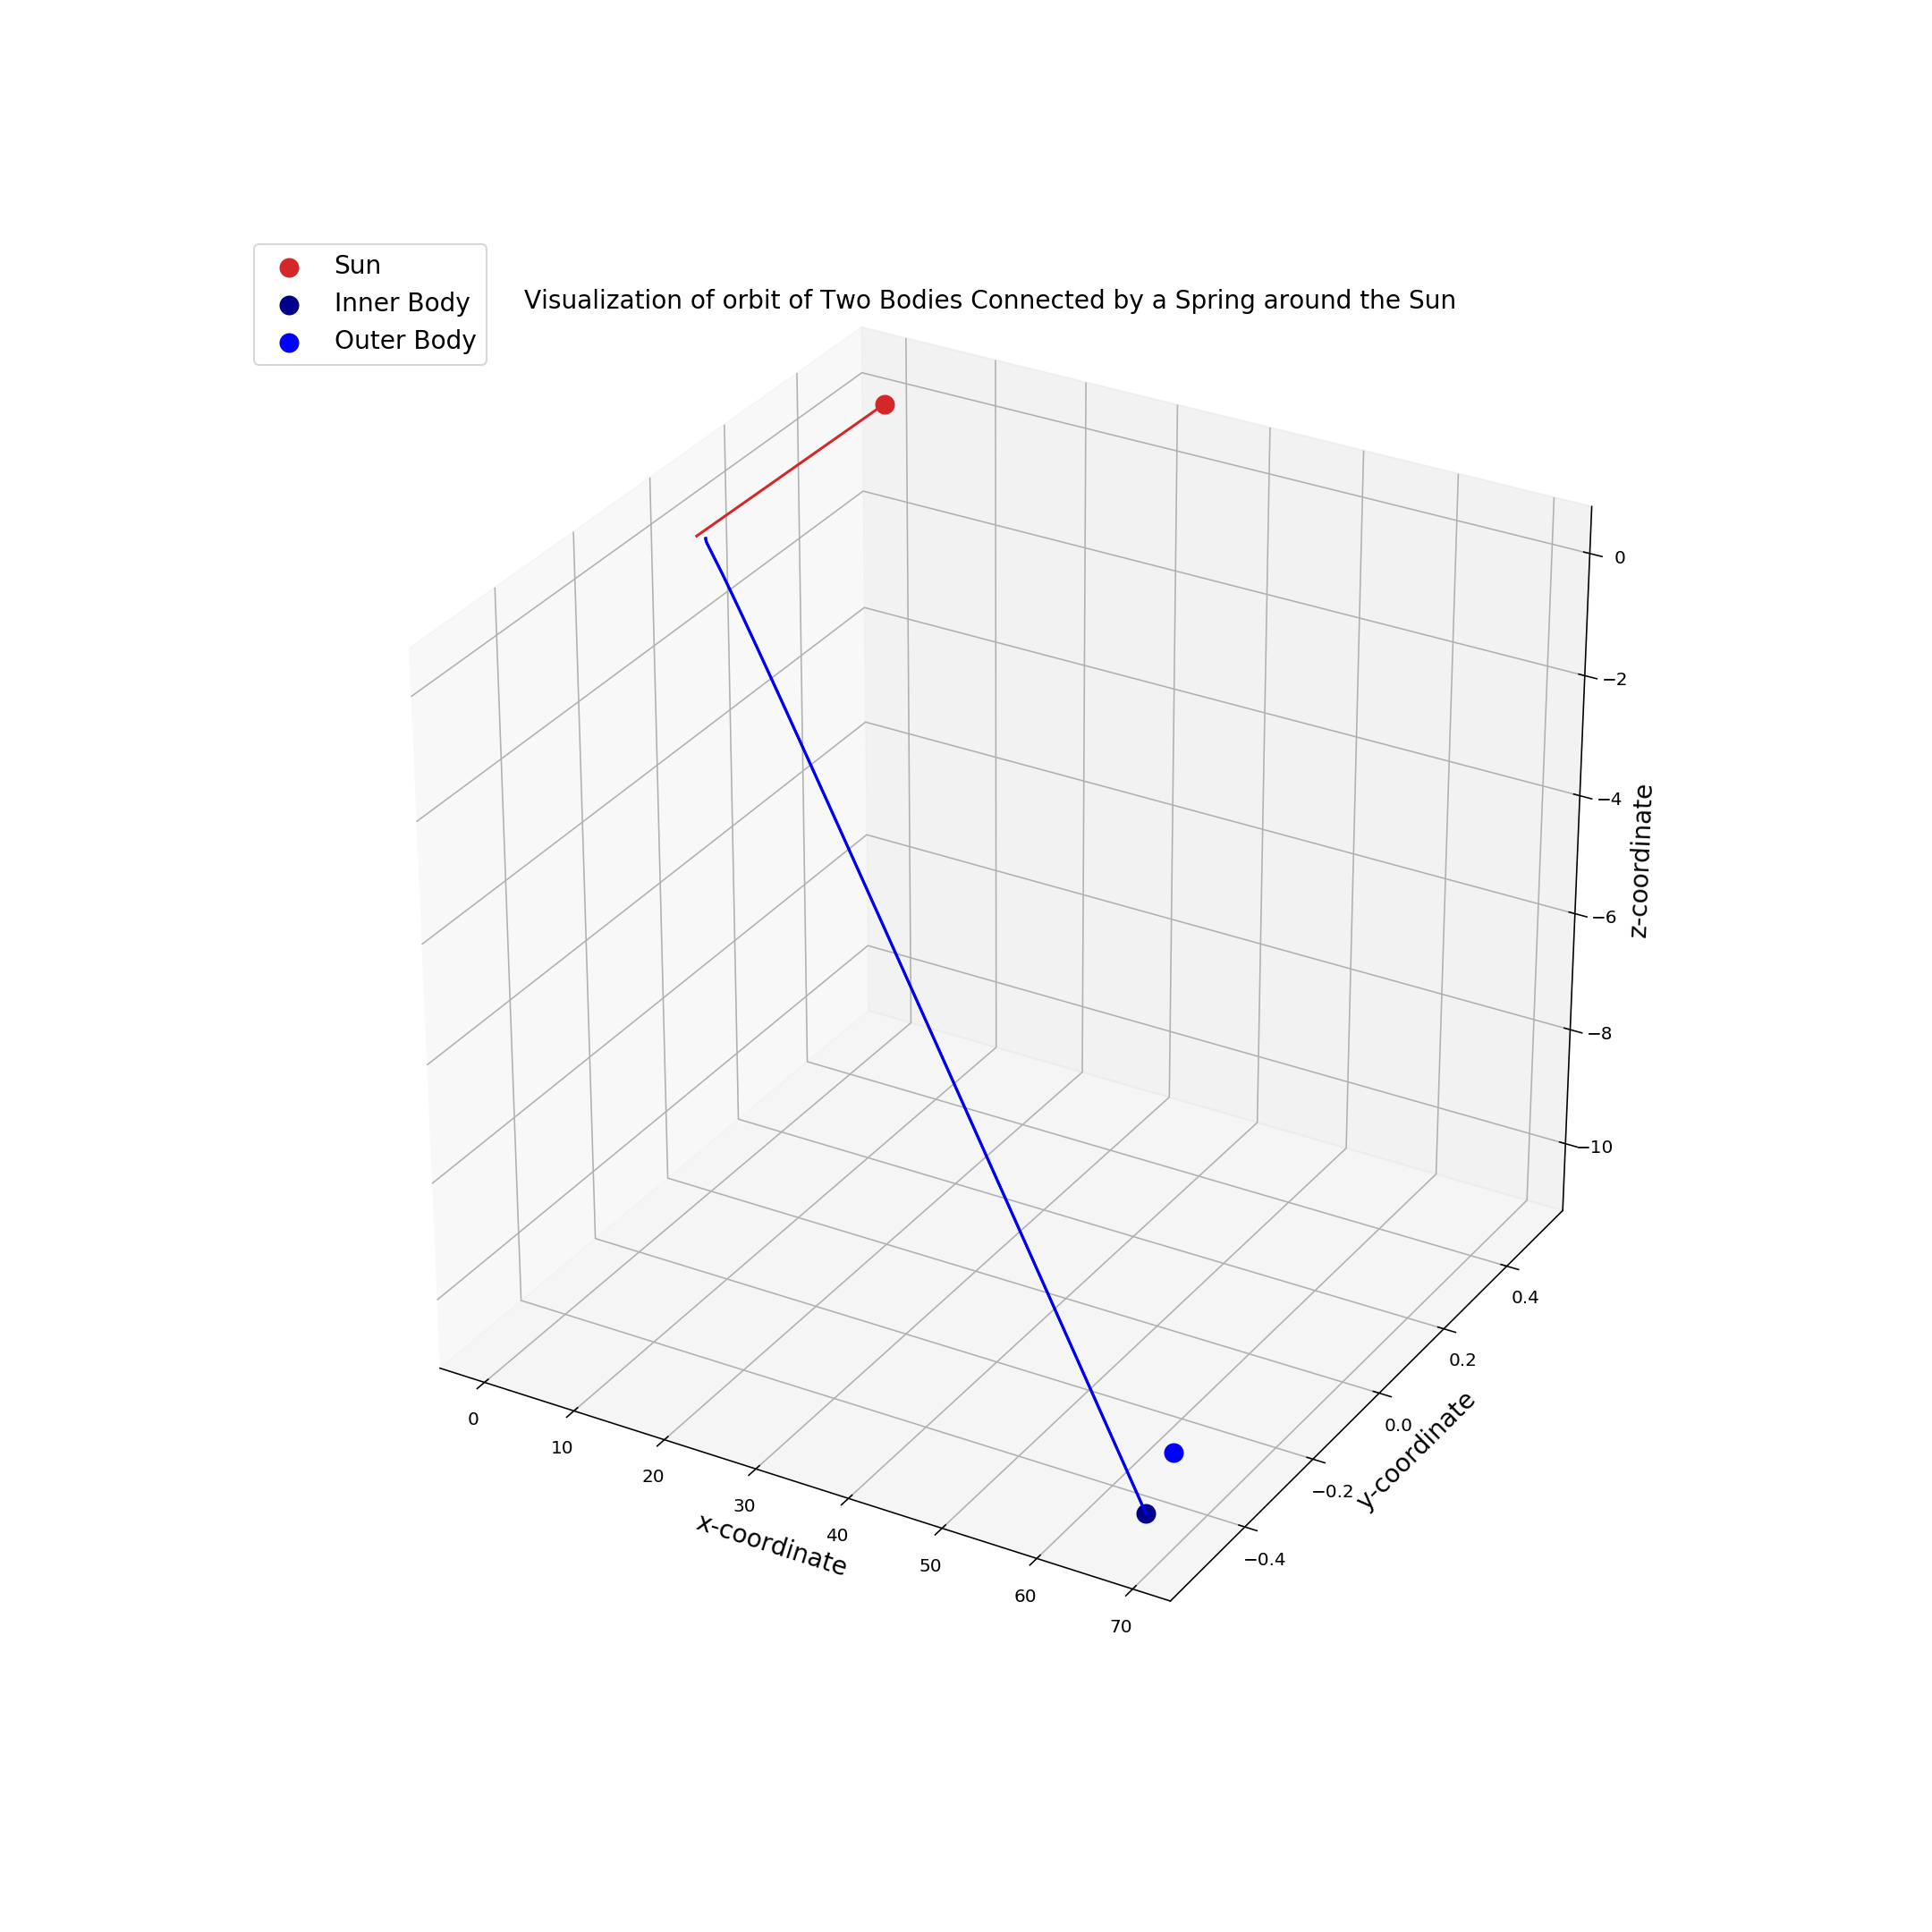

In [71]:
%matplotlib notebook
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(rc_sol[:,0],rc_sol[:,1],rc_sol[:,2],color="tab:red")
ax.plot(ri_sol[:,0],ri_sol[:,1],ri_sol[:,2],color="darkblue")
ax.plot(ri_sol[:,0],ri_sol[:,1],ri_sol[:,2],color="blue")
#Plot the final positions of the bodies
ax.scatter(rc_sol[-1,0],rc_sol[-1,1],rc_sol[-1,2],color="tab:red",marker="o",s=100,label="Sun")
ax.scatter(ri_sol[-1,0],ri_sol[-1,1],ri_sol[-1,2],color="darkblue",marker="o",s=100,label="Inner Body")
ax.scatter(ro_sol[-1,0],ro_sol[-1,1],ro_sol[-1,2],color="blue",marker="o",s=100,label="Outer Body")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbit of Two Bodies Connected by a Spring around the Sun\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [72]:
'''
Okay so clearly I've tried to do too much at once. Let's take a step back and make sure that two planets can orbit
side by side before we go adding in any springs to the mix...

Further notes:
Of course 2 earth-mass bodies are going to affect each other gravitationally, we need to ignore the gravitational
effects of the two orbiting bodies on each other for now, and also decrease their masses, to be more realistic to the 
problem at hand. Two particles of the scale we're looking at are so small that the mo*mi terms should go to zero
anyways.
'''

"\nOkay so clearly I've tried to do too much at once. Let's take a step back and make sure that two planets can orbit\nside by side before we go adding in any springs to the mix...\n"

In [156]:
#First, without the spring force
def ThreeBodyEquations(w,t,G,Mc,mi,mo):
    rc=w[:3]
    ri=w[3:6]
    ro=w[6:9]
    vc=w[9:12]
    vi=w[12:15]
    vo=w[15:18]
    
    r1=sci.linalg.norm(ri-rc)
    r2=sci.linalg.norm(ri-ro)
    r3=sci.linalg.norm(ro-rc)
    
    dvcbydt=K1*(mo*(rc-ro)/r3**3 + mi*(rc-ri)/r1**3)
    dvibydt=K1*(Mc*(ri-rc)/r1**3) #mo term goes to zero
    dvobydt=K1*(Mc*(ro-rc)/r3**3) #mi term goes to zero
    drcbydt=K2*vc
    dribydt=K2*vi
    drobydt=K2*vo
    
    rci_derivs=sci.concatenate((drcbydt,dribydt))
    r_derivs=sci.concatenate((rci_derics,drobydt))
    vci_derivs=sci.concatenate((dvcbydt,dvibydt))
    v_derivs=sci.concatenate((vci_derivs,dvobydt))
    derivs=sci.concatenate((r_derivs,v_derivs))
    return derivs

In [157]:
#Define news masses in terms of solar masses
#For now we will set mi=mo
Mc=1 #One solar mass
mi=0.003003 #1 Earth mass
mo=0.003003 #1 Earth mass
#mo=0.000003003 #1/1000 Earth mass

#Define initial position vectors
#Starting with "Sun" at the center and each orbiting mass at slightly different radii (about 1/10th the distance of the 
#Earth to the moon).
rc=[0,0,0] #m
ri=[0.9999,0,0] #m
ro=[1.0001,0,0] #m

#Convert pos vectors to arrays
rc=sci.array(rc,dtype="float64")
ri=sci.array(ri,dtype="float64")
ro=sci.array(ro,dtype="float64")

#Find Centre of Mass
r_com=(Mc*rc + mi*ri + mo*ro)/(Mc + mi + mo)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
v3=[0,-0.01,0]

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")

#Find velocity of COM
v_com=(Mc*v1 + mi*v2 + mo*v3)/(Mc + mi + mo)

In [158]:
#Package initial parameters
init_params=sci.array([rc,ri,ro,v1,v2,v3]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,20,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
spring_sol=sci.integrate.odeint(SpringEquations,init_params,time_span,args=(G,Mc,mi,mo))

In [159]:
rc_sol=spring_sol[:,:3]
ri_sol=spring_sol[:,3:6]
ro_sol=spring_sol[:,6:9]

<IPython.core.display.Javascript object>


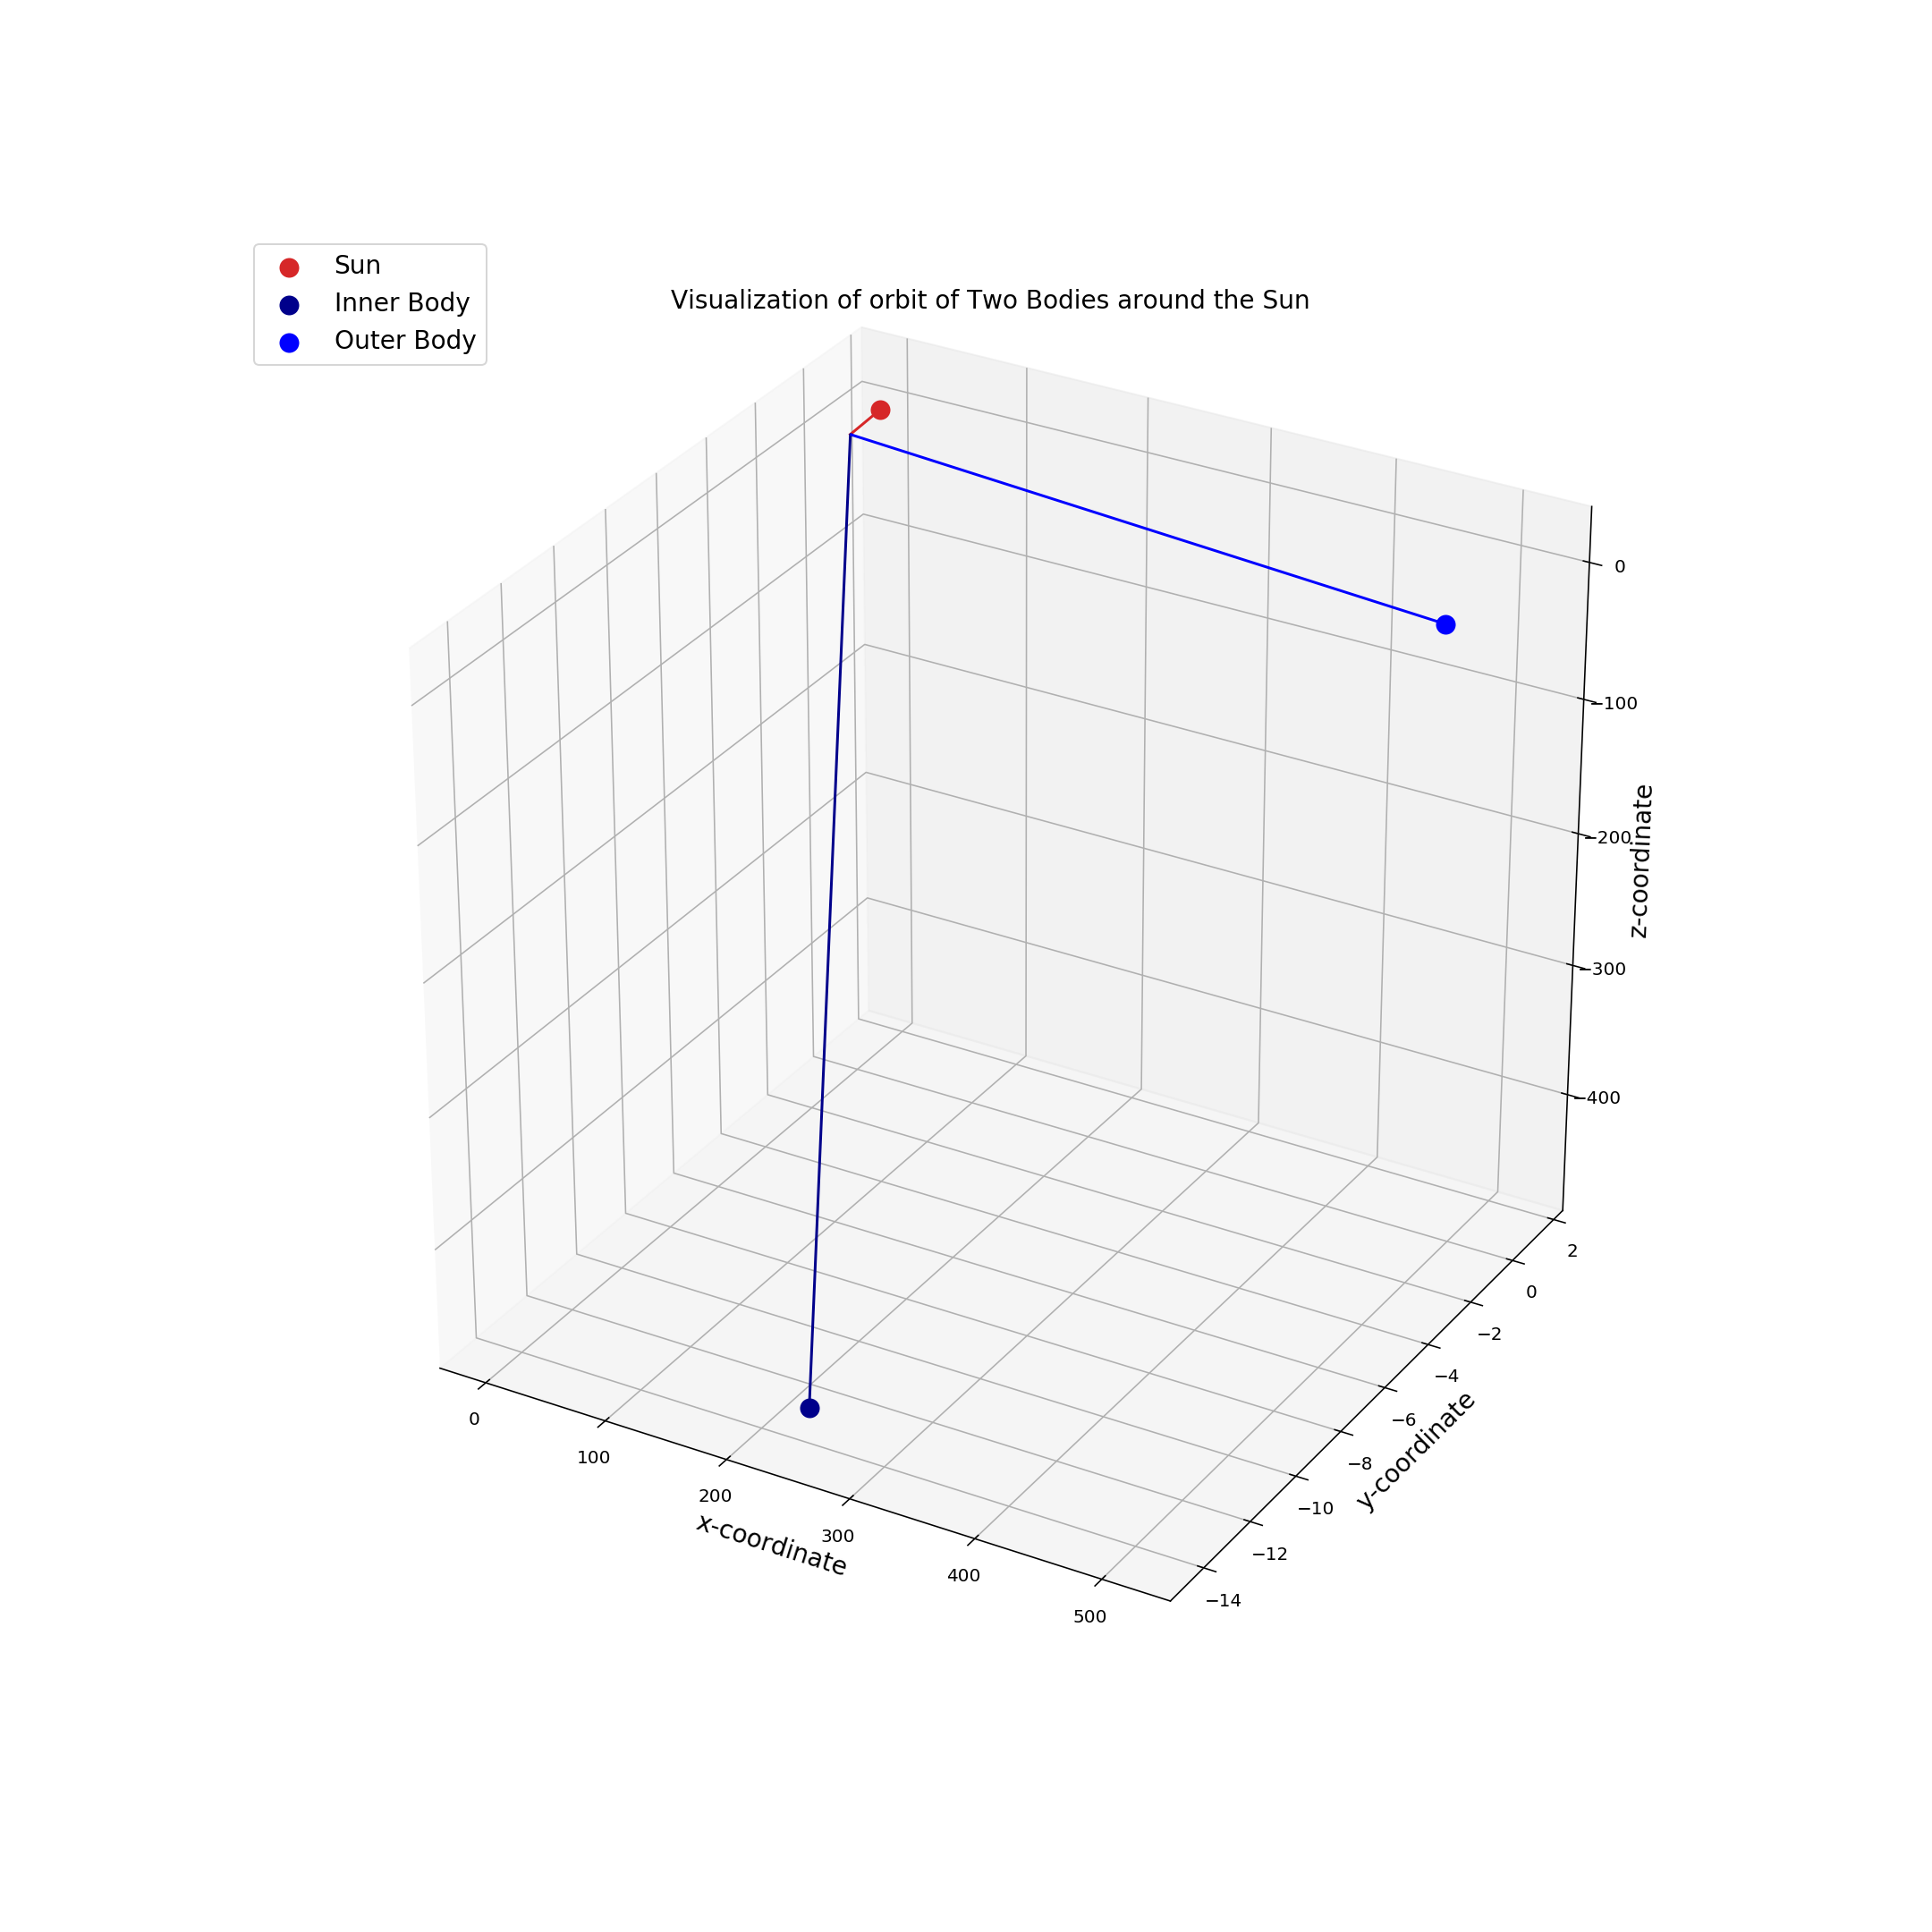

In [160]:
%matplotlib notebook
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(rc_sol[:,0],rc_sol[:,1],rc_sol[:,2],color="tab:red")
ax.plot(ri_sol[:,0],ri_sol[:,1],ri_sol[:,2],color="darkblue")
ax.plot(ro_sol[:,0],ro_sol[:,1],ro_sol[:,2],color="blue")
#Plot the final positions of the bodies
ax.scatter(rc_sol[-1,0],rc_sol[-1,1],rc_sol[-1,2],color="tab:red",marker="o",s=100,label="Sun")
ax.scatter(ri_sol[-1,0],ri_sol[-1,1],ri_sol[-1,2],color="darkblue",marker="o",s=100,label="Inner Body")
ax.scatter(ro_sol[-1,0],ro_sol[-1,1],ro_sol[-1,2],color="blue",marker="o",s=100,label="Outer Body")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbit of Two Bodies around the Sun\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [136]:
'''
It seems that the ODE solver has some trouble doing its job when one of the objects is orders of magnitude larger
than the others, as the basic idea behind this method is geared towards observing how 2 and 3 body star systems 
behave. So let's return to working with two bodies again, but change the force equations to reflect how they affected
the now "unseen" gravity from a star that we will consider stationary, given that particles of this magnitude should
have a very minimal gravitational effect on it.
'''

'\nIt seems that the ODE solver has some trouble doing its job when one of the objects is orders of magnitude larger\nthan the others, as the basic idea behind this method is geared towards observing how 2 and 3 body star systems \nbehave. So let\'s return to working with two bodies again, but change the force equations to reflect how they affected\nthe now "unseen" gravity from a star that we will consider stationary, given that particles of this magnitude should\nhave a very minimal gravitational effect on it.\n'

In [193]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2

#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#Using these reference quantities we can absorb everything into the following net constants, allowing masses, positions,
#velocities, etc. to be non-demensionalized

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd
k=1e+11
K3=k*r_nd

#Now all quantities are in terms of reference quantities

#Define masses in terms of solar masses
Mc=1.1 #Alpha Centauri A
m1=0.3 #Earth-size planet
m2=0.3 #Earth-size planet

#Define initial position vectors
#Plus or minus 1 Earth Orbital Radius
r1=[-1.496e+11,0,0] #m
r2=[1.496e+11,0,0] #m

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1 + m2*r2)/(m1 + m2)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1 + m2*v2)/(m1 + m2)

def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    
    dv1bydt=K1*Mc*(r1)/r**3-K3*(r2-r1)
    dv2bydt=K1*Mc*(r2)/r**3-K3*(r1-r2)
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [194]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,20,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

/Users/tristanbachmann/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [195]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

<IPython.core.display.Javascript object>


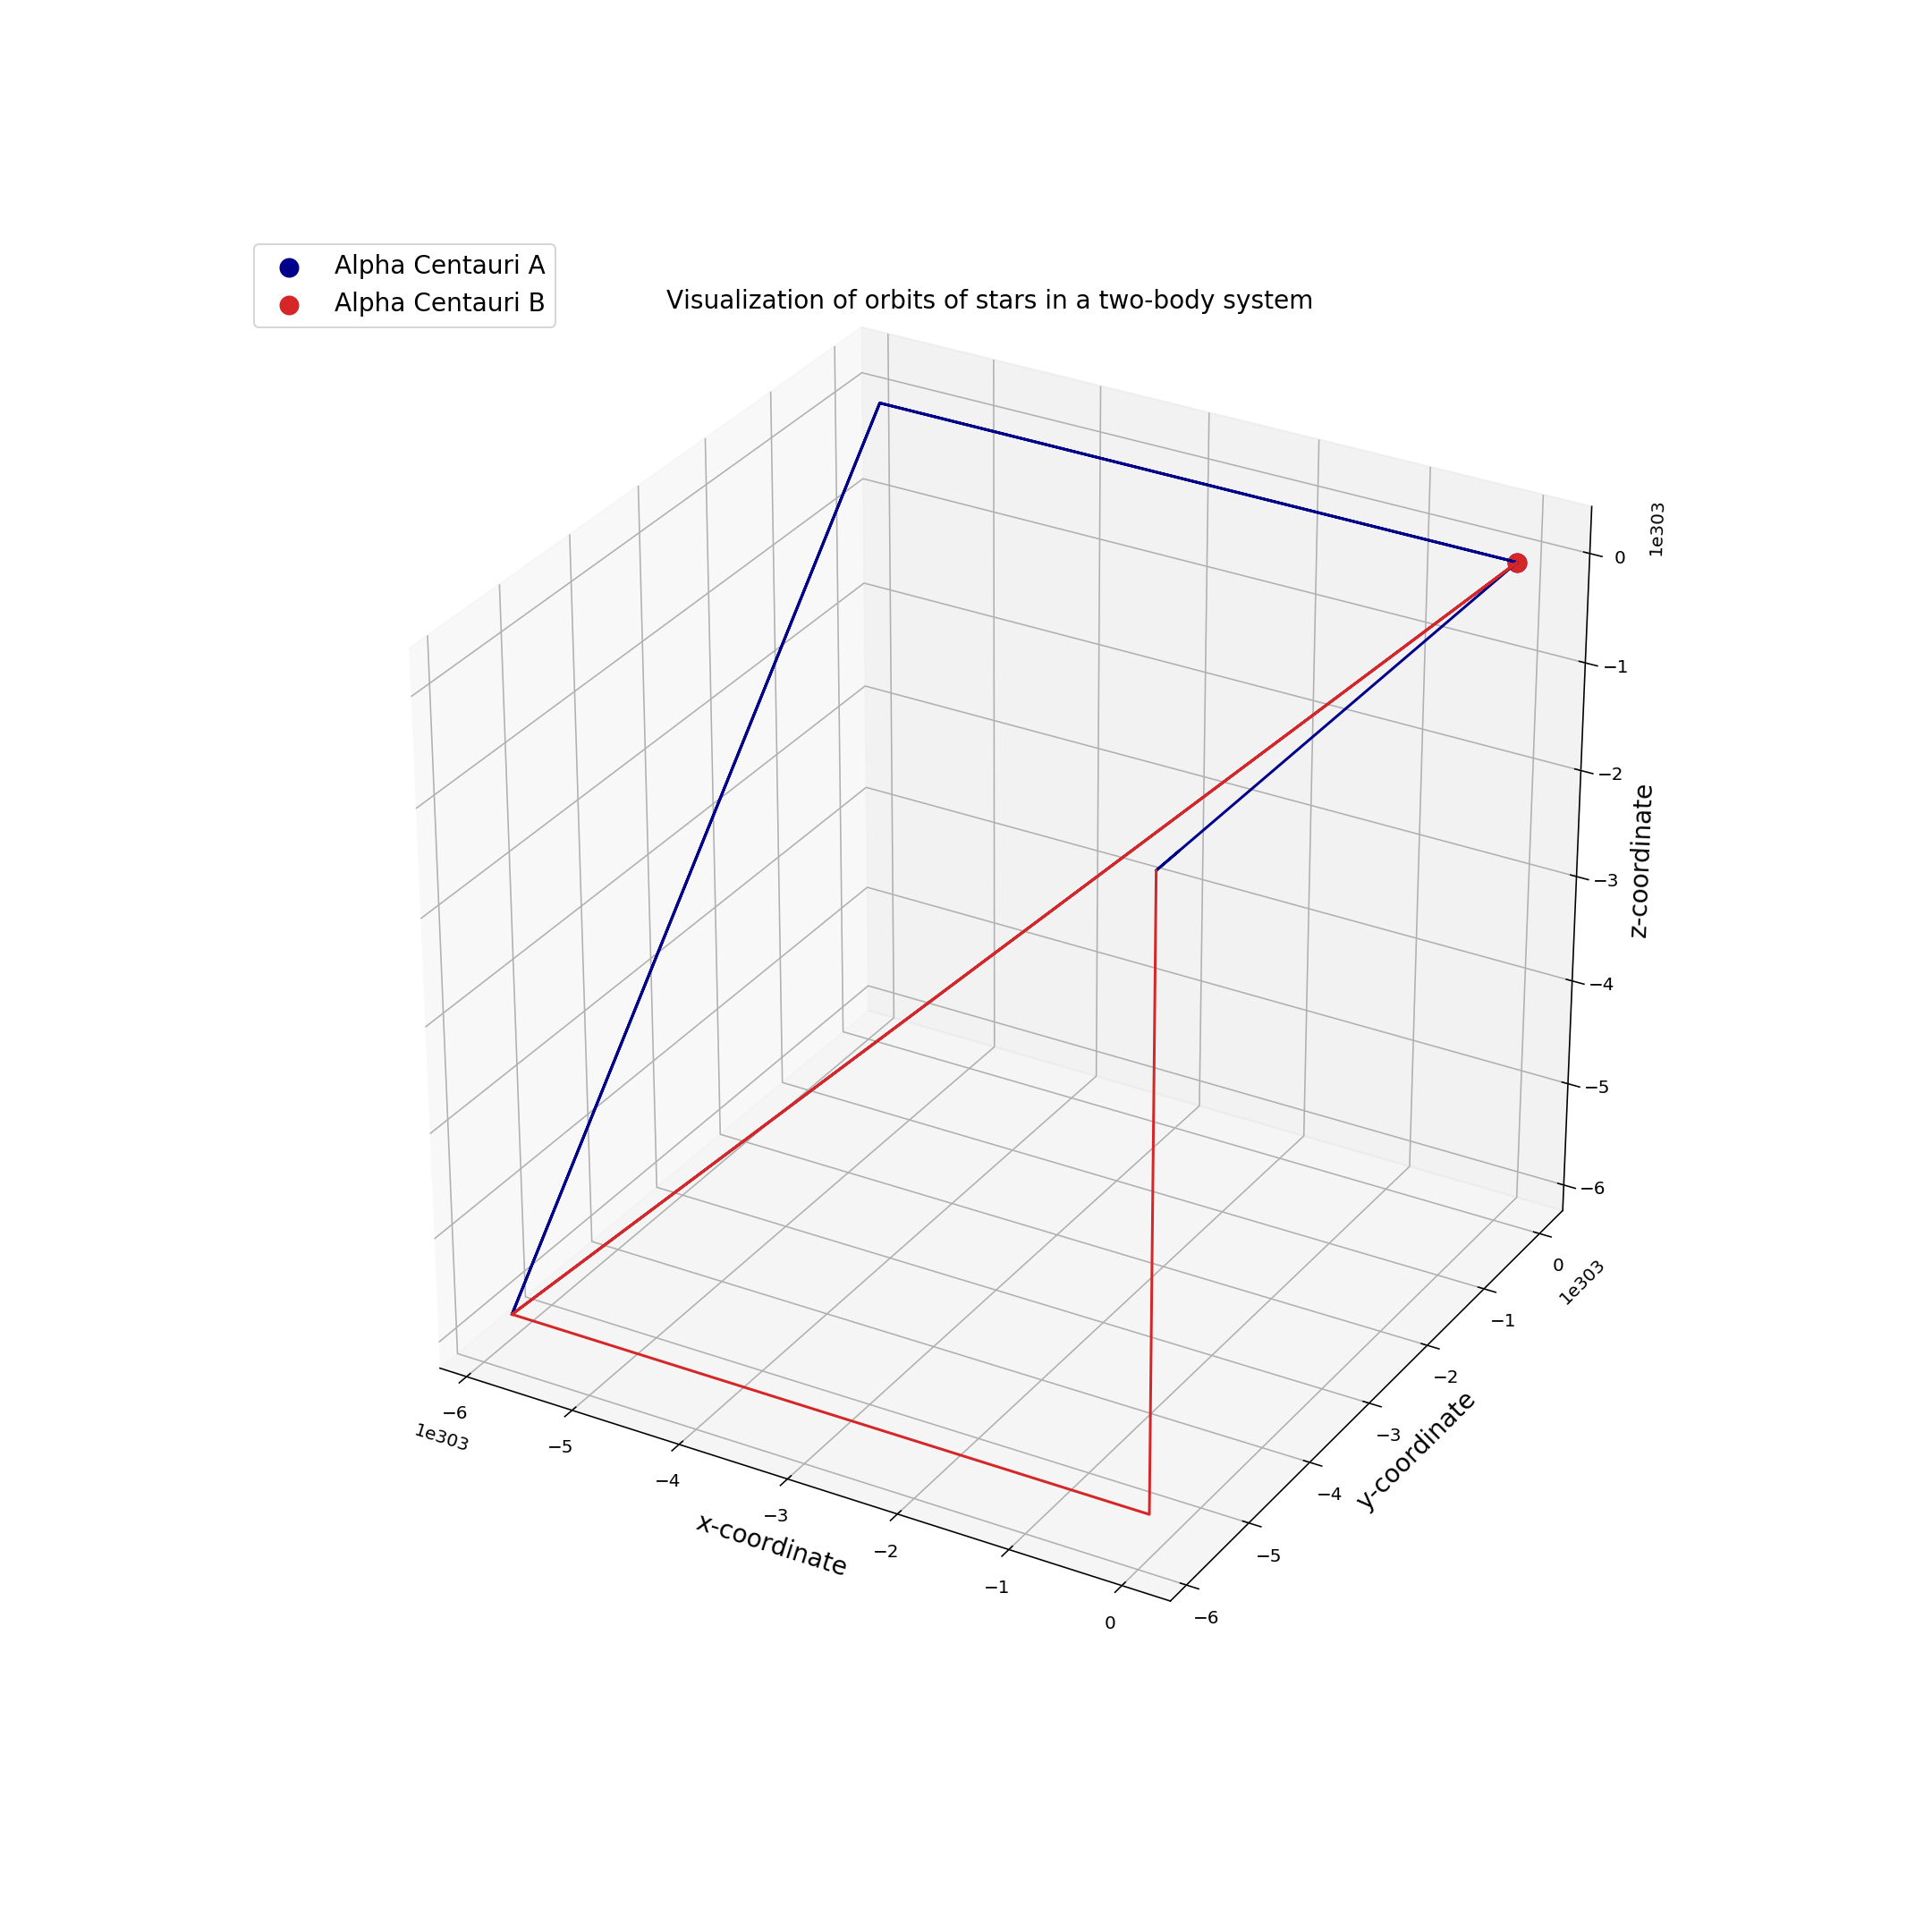

In [196]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [182]:
'''
Part of the problem may be that we are trying to non-dimensionalize these quantities using star masses, which will 
inherently cause particles the size of dust particles to blow up the solutions. Let's try this without using K's, and
the actual constants instead.
'''

"\nPart of the problem may be that we are trying to non-dimensionalize these quantities using star masses, which will \ninherently cause particles the size of dust particles to blow up the solutions. Let's try this without using K's, and\nthe actual constants instead.\n"

In [186]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2

Mc=1.989e+30 #The Sun #kg
m1=1 #1 kg small body
m2=1 #1 kg small body

#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1 + m2*r2)/(m1 + m2)

#Define initial velocities
v1=[0.01*30000,0.01*30000,0] #m/s
v2=[-0.05*30000,0,-0.1*30000] #m/s

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1 + m2*v2)/(m1 + m2)

def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    
    dv1bydt=K1*Mc*(r1)/r**3-K3*(r2-r1)
    dv2bydt=K1*Mc*(r2)/r**3-K3*(r1-r2)
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [187]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,20,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

<IPython.core.display.Javascript object>


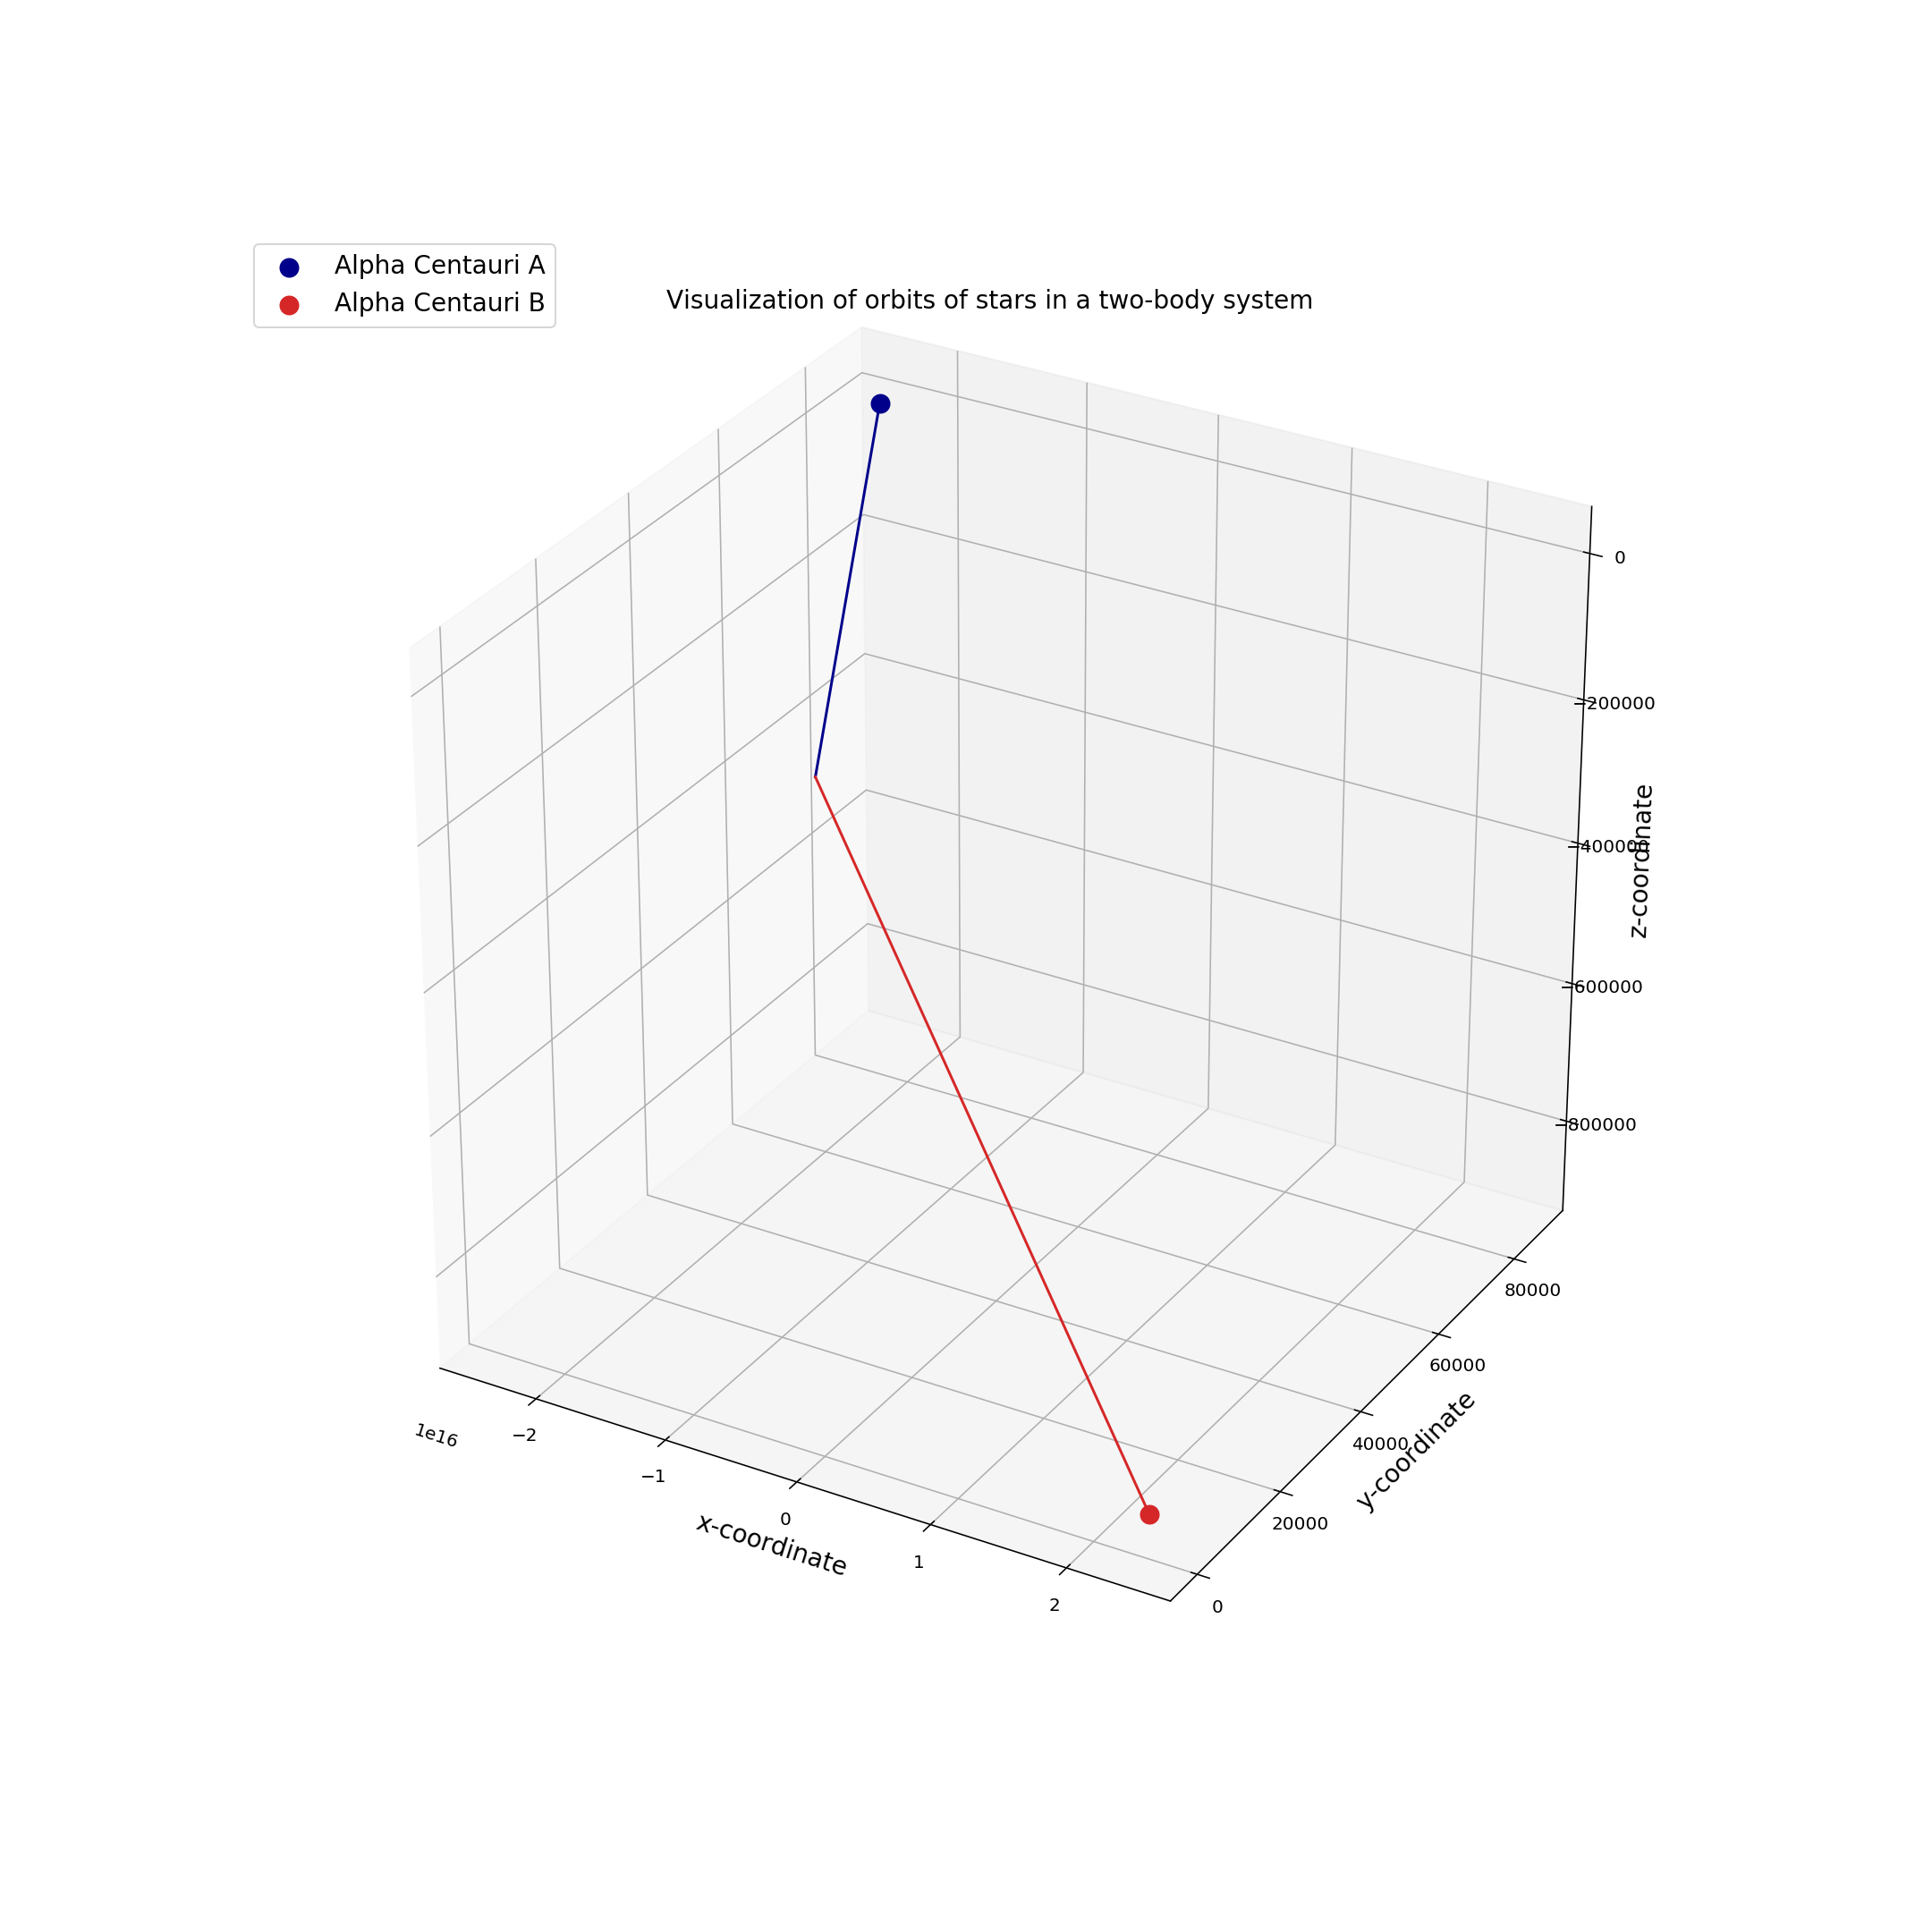

In [188]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [189]:
'''
Okay I'm going to try another method with the same principles, this time using the same physics, but not using the ODE
solver, which might be overkill at this stage. I'll import Vpython too.
'''

"\nOkay I'm going to try another method with the same principles, this time using the same physics, but not using the ODE\nsolver, which might be overkill at this stage. I'll import Vpython too.\n"

In [192]:
from visual import *

ModuleNotFoundError: No module named 'visual'